In [1]:
# Data Visualization and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Image Processing
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

# Deep Learning and Machine Learning
from tensorflow.keras.applications import ResNet50
import pathlib
import re
import shutil
import numpy as np
import random
import skimage as sk
from skimage import io
from skimage.util import img_as_ubyte
from sklearn.metrics import classification_report

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning Libraries
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer

# TensorFlow
import tensorflow as tf
import random as rn

In [2]:
IMG_SIZE = 256
data_dir = 'Fire-Detection'
data_dir = pathlib.Path(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

image_count = len(list(data_dir.glob('*/*.jpg'))) + len(list(data_dir.glob('*/*.JPG'))) + len(list(data_dir.glob('*/*.png')))  + len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

['0' '1']
1282


###  Plot Histogram 

In [3]:
f = [item_num for item_num in data_dir.rglob('*')] 
# print(f'f : {f} ') ## path all the images 0 & 1 both

values, counts = np.unique([x.parent for x in f ], return_counts=True) ## values -> path ; 
print(f'values : {values} \n counts : {counts} \n')
print(f"Tuppel of values and count {list(zip(counts, values))}\n\n")

x_name = tuple(class_names) 
y_pos = np.arange(len(x_name))
x_value = list(counts)

print (f'x_name {x_name} \n y_pos : {y_pos} \nx_value : {x_value} ' )

x_value.pop(0)
print(f'x_value : {x_value}')

values : [WindowsPath('Fire-Detection') WindowsPath('Fire-Detection/0')
 WindowsPath('Fire-Detection/1')] 
 counts : [  2 541 110] 

Tuppel of values and count [(2, WindowsPath('Fire-Detection')), (541, WindowsPath('Fire-Detection/0')), (110, WindowsPath('Fire-Detection/1'))]


x_name ('0', '1') 
 y_pos : [0 1] 
x_value : [2, 541, 110] 
x_value : [541, 110]


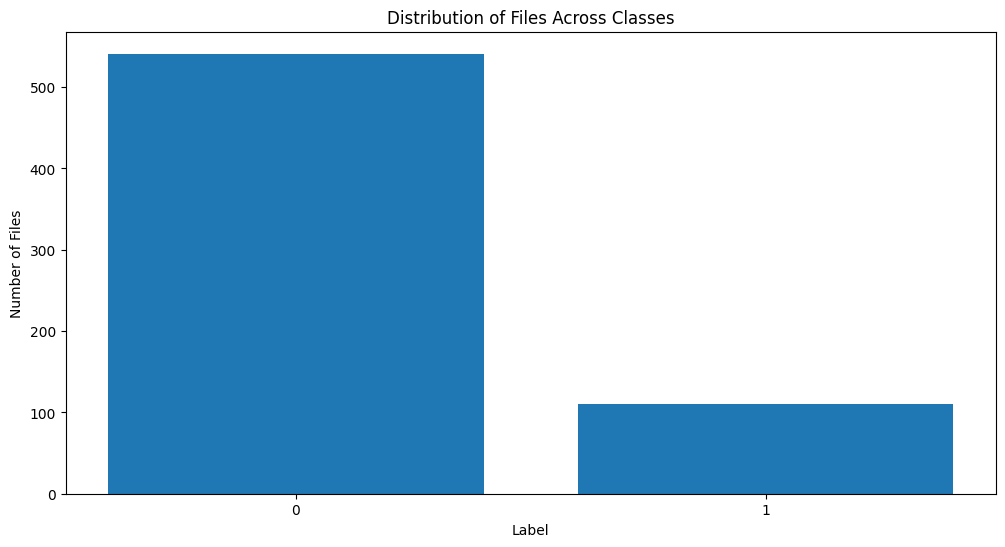

In [4]:
class_counts = dict(zip(x_name, x_value))
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Label')
plt.ylabel('Number of Files')
plt.title('Distribution of Files Across Classes')
plt.show()

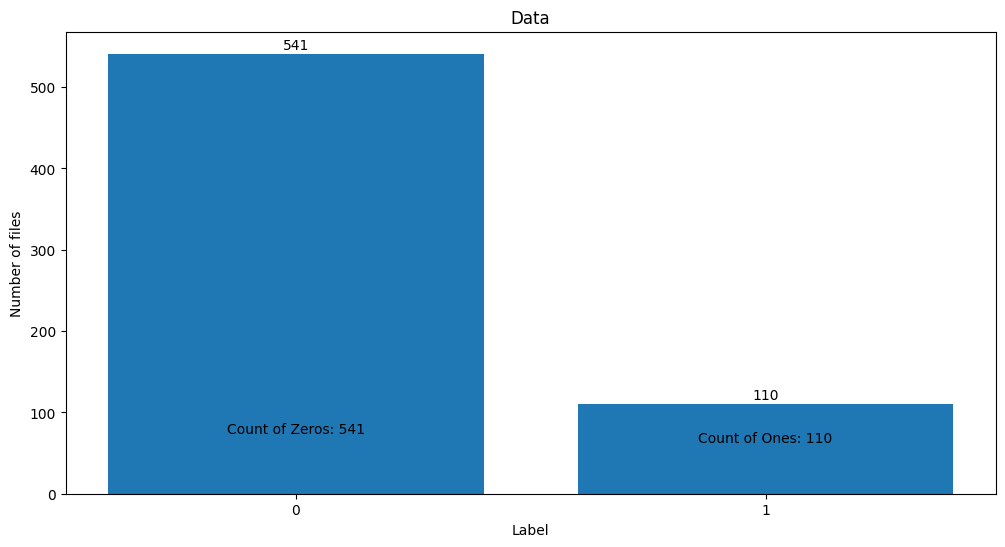

In [5]:
plt.subplots(figsize=(12,6))
bars = plt.bar(class_counts.keys(), class_counts.values())
for bar in bars:
#     yval = bar.get_height()
#     print(f'{bar.get_x()} \n {bar.get_width()/2}\n {bar.get_x() + bar.get_width() / 2} \n  {yval + 2} \n  {yval} \n')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, bar.get_height(), ha='center', va='bottom')
plt.text(0,70, f"Count of Zeros: {x_value[0]}", ha='center', va='bottom')
plt.text(1,60, f"Count of Ones: {x_value[1]}", ha='center', va='bottom')
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Data')
plt.show()

 ## Data Dividing 

###### Creating new variables 
Two classes (i=0 and i=1) in the "Fire-Detection" directory

In [6]:
for i in range(0, 2):
      var = pathlib.Path("Fire-Detection/"+str(i)+"/*")
      print(f'var : {var}')
    
      list_ds = tf.data.Dataset.list_files(str(var), shuffle=True)
      print(f'list_ds : {list_ds}')
    
      image_count = len(list(data_dir.glob(str(i)+'/*.jpg')))  + len(list(data_dir.glob(str(i)+'/*.png')))  + len(list(data_dir.glob(str(i)+'/*.jpeg')))
      print(f'image_count : {image_count}')
    
      val_size = int(image_count * 0.3)
      print(f'\n\n\nvalidation_size : {val_size}\n\n')
    
      train_ds_list = list_ds.skip(val_size)
      print(f'** train_ds_list : {train_ds_list}')
      globals()['train_ds_list_%s' % i] = train_ds_list
        
      list_a = list_ds.take(val_size)
      print(f'list_a : {list_a}')
        
      list_a_size = tf.data.experimental.cardinality(list_a).numpy()
      print(f'list_a_size : {list_a_size}')
        
      test_ds_list = list_a.skip(list_a_size * 0.5)
      print(f'**test_ds_list : {test_ds_list}')
      globals()['test_ds_list_%s' % i] = test_ds_list
    
      val_ds_list = list_a.take(list_a_size * 0.5)
      print(f'** val_ds_list : {val_ds_list}')
      globals()['val_ds_list_%s' % i] = val_ds_list
      print(f'{i} : {image_count}')
      print ('\n\n\n\n\n\n\n')

        

var : Fire-Detection\0\*
list_ds : <ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
image_count : 541



validation_size : 162


** train_ds_list : <SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
list_a : <TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
list_a_size : 162
**test_ds_list : <SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
** val_ds_list : <TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
0 : 541








var : Fire-Detection\1\*
list_ds : <ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
image_count : 110



validation_size : 33


** train_ds_list : <SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
list_a : <TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
list_a_size : 33
**test_ds_list : <SkipDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=


Concatenates the datasets for each class into overall validation, testing, and training datasets.

In [7]:
val_ds_list = val_ds_list_0.concatenate(val_ds_list_1)
test_ds_list = test_ds_list_0.concatenate(test_ds_list_1)
train_ds_list = train_ds_list_0.concatenate(train_ds_list_1)

###### Creates a directory for the training dataset.

In [8]:
data_dir_train = pathlib.Path("Fire-Detection-train")
if not os.path.exists(data_dir_train):
  os.makedirs(data_dir_train)

In [9]:
for f in train_ds_list.as_numpy_iterator():
    link = f.decode("utf-8")
    substring = re.search(r'(.*)[\\|/](.*)[\\|/](.*)', link)
    if substring:
        dst = pathlib.Path("Fire-Detection-train/" + substring.group(2))
        if not os.path.exists(dst):
            os.makedirs(dst)
        shutil.copy2(link, dst)
    else:
        print(f"Error: Unable to extract class information from link: {link}")

[527, 557]


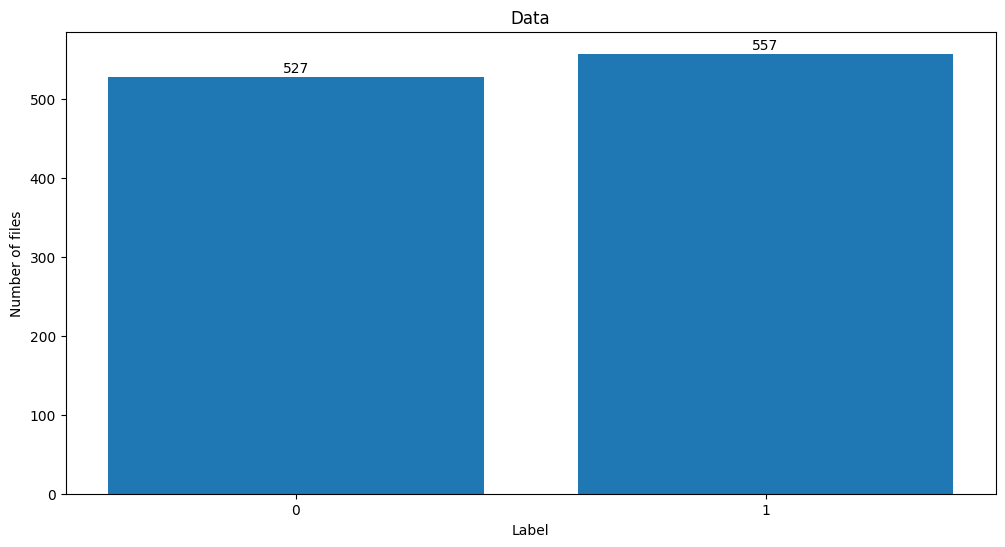

In [10]:
f2 = [item_num2 for item_num2 in data_dir_train.rglob('*')] 
values2, counts2 = np.unique([x2.parent for x2 in f2 ], return_counts=True)
x_value2 = list(counts2)
#print(list(zip(counts2, values2)))
x_name2 = tuple(class_names) 
y_pos2 = np.arange(len(x_name2))
x_value2.pop(0)
print(x_value2)
plt.subplots(figsize=(12,6))
bars = plt.bar(y_pos2, x_value2, align='center', alpha=1)
for bar in bars:
    yval2 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval2 + 2, yval2, ha='center', va='bottom')
plt.xticks(y_pos2, x_name2)
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Data')
plt.show()


###### Creates a directory for the validation dataset.

In [11]:
data_dir_val = pathlib.Path("Fire-Detection-val")
if not os.path.exists(data_dir_val):
  os.makedirs(data_dir_val)


In [12]:
for f in val_ds_list.as_numpy_iterator():
  link = f.decode("utf-8")
  substring = re.search(r'(.*)[\\|/](.*)[\\|/](.*)', link)
  dst = pathlib.Path("Fire-Detection-val/"+substring.group(2))
  if not os.path.exists(dst):
    os.makedirs(dst)
  shutil.copy2(link, dst)


[215, 41]


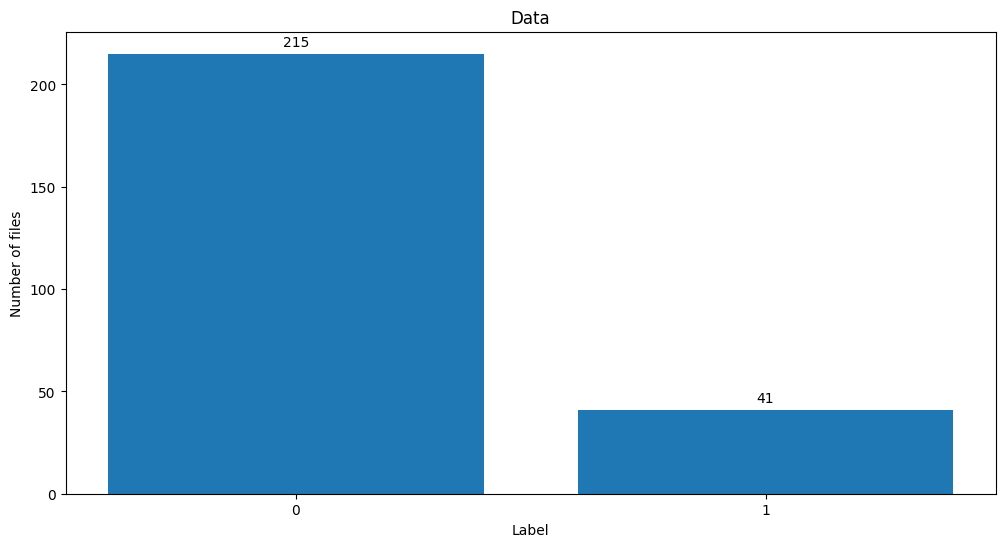

In [13]:
f2 = [item_num2 for item_num2 in data_dir_val.rglob('*')] 
values2, counts2 = np.unique([x2.parent for x2 in f2 ], return_counts=True)
x_value2 = list(counts2)
#print(list(zip(counts2, values2)))
x_name2 = tuple(class_names) 
y_pos2 = np.arange(len(x_name2))
x_value2.pop(0)
print(x_value2)
plt.subplots(figsize=(12,6))
bars = plt.bar(y_pos2, x_value2, align='center', alpha=1)
for bar in bars:
    yval2 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval2 + 2, yval2, ha='center', va='bottom')
plt.xticks(y_pos2, x_name2)
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Data')
plt.show()


###### Creates a directory for the testing dataset.

In [14]:
data_dir_test = pathlib.Path("Fire-Detection-test")
if not os.path.exists(data_dir_test):
  os.makedirs(data_dir_test)


In [15]:
for f in test_ds_list.as_numpy_iterator():
  link = f.decode("utf-8")
  substring = re.search(r'(.*)[\\|/](.*)[\\|/](.*)', link)
  dst = pathlib.Path("Fire-Detection-test/"+substring.group(2))
  if not os.path.exists(dst):
    os.makedirs(dst)
  shutil.copy2(link, dst)


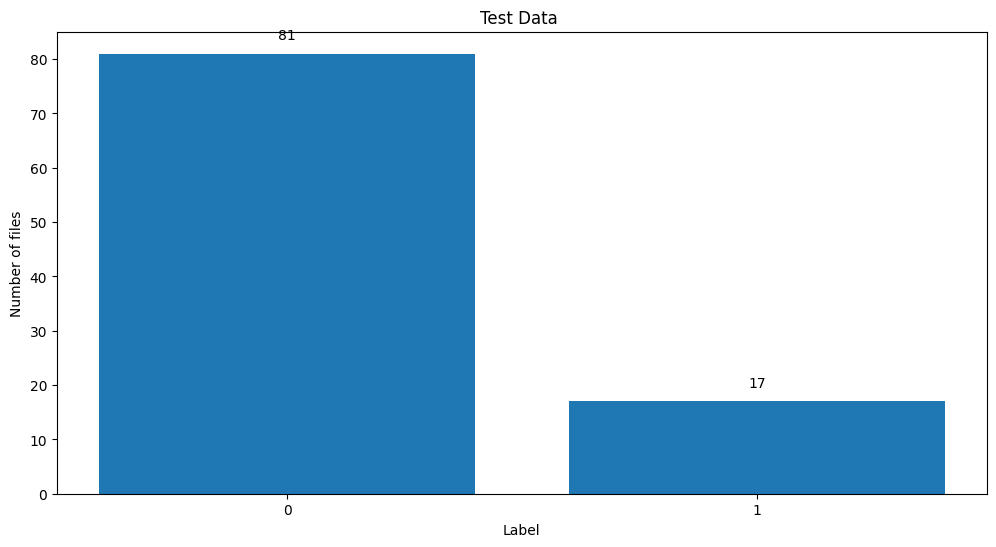

In [16]:
# Get the counts of files for each class in the test dataset
f_test = [item for item in test_ds_list.as_numpy_iterator()]
values_test, counts_test = np.unique([re.search(r'(.*)[\\|/](.*)[\\|/](.*)', f.decode("utf-8")).group(2) for f in f_test], return_counts=True)

# Extract class names and counts
x_name_test = tuple(values_test)
x_value_test = list(counts_test)

# Plot histogram
plt.subplots(figsize=(12, 6))
bars_test = plt.bar(np.arange(len(x_name_test)), x_value_test, align='center', alpha=1)
for bar in bars_test:
    yval_test = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval_test + 2, yval_test, ha='center', va='bottom')
plt.xticks(np.arange(len(x_name_test)), x_name_test)
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Test Data ')
plt.show()


## Data Augmentation

**Histogram Equalization:**
Histogram equalization is a technique used to improve the contrast of an image by redistributing pixel intensities.

**Rotation:**
Rotate the image by a certain angle (e.g., 90 degrees, 180 degrees).

**Scaling:**
Resize the image to a different size.

**Flipping:**
Flip the image horizontally, vertically, or both.

**Crop:**
Randomly crop a portion of the image.

**Translation:**
Shift the image horizontally and/or vertically.

**Brightness Adjustment:**
Adjust the brightness of the image.

**Contrast Adjustment:**
Adjust the contrast of the image.

**Gamma Correction:**
Apply gamma correction to adjust the brightness and contrast.

**Noise Addition:**
Add random noise (e.g., Gaussian noise, salt and pepper noise) to the image.

**Blur:**
Apply blur to the image (e.g., Gaussian blur, median blur).

**Sharpening:**
Enhance the edges of objects in the image.

**Elastic Deformation:**
Distort the image using elastic deformation.

**Color Jitter:**
Randomly change the hue, saturation, and brightness of the image.

**Shear:**
Apply shear transformation to the image.

**Perspective Transformation:**
Apply perspective transformation to simulate different viewpoints.


In [17]:
def none(filename):
    return filename

def histogram(filename):
    colorimage_b = cv2.equalizeHist(filename[:,:,0])
    colorimage_g = cv2.equalizeHist(filename[:,:,1])
    colorimage_r = cv2.equalizeHist(filename[:,:,2])
    colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
    return colorimage_e

# dictionary of the transformations we defined earlier
available_transformations = {
    'none': none,
    'histogram': histogram
}

for i in range(0, 2):
  num_files_desired = 600
  folder_path = os.path.join(str(data_dir_train)+"/"+str(i))
  image_count = len(list(data_dir_train.glob(str(i)+'/*.jpg'))) + len(list(data_dir_train.glob(str(i)+'/*.JPG'))) + len(list(data_dir_train.glob(str(i)+'/*.png')))  + len(list(data_dir_train.glob(str(i)+'/*.jpeg')))
  plus = num_files_desired - image_count - 1
  
  if plus >= 0:
    images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    num_generated_files = 0
    while num_generated_files <= plus:      
        image_path = random.choice(images) # random image from the folder
        image_to_transform = sk.io.imread(image_path)
        num_transformations_to_apply = 1
        num_transformations = 0
        transformed_image = None
        while num_transformations <= num_transformations_to_apply:
            # random transformation to apply for a single image
            key = random.choice(list(available_transformations))
            transformed_image = available_transformations[key](image_to_transform)
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_RGBA2BGR)
            transformed_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
            num_transformations += 1
            new_file_path = '%s/augmented_%s.JPG' % (folder_path, num_generated_files)
            io.imsave(new_file_path, img_as_ubyte(transformed_image))
        num_generated_files += 1

###### Plot histogram for dara_dir_train after enhance data


[527, 557]


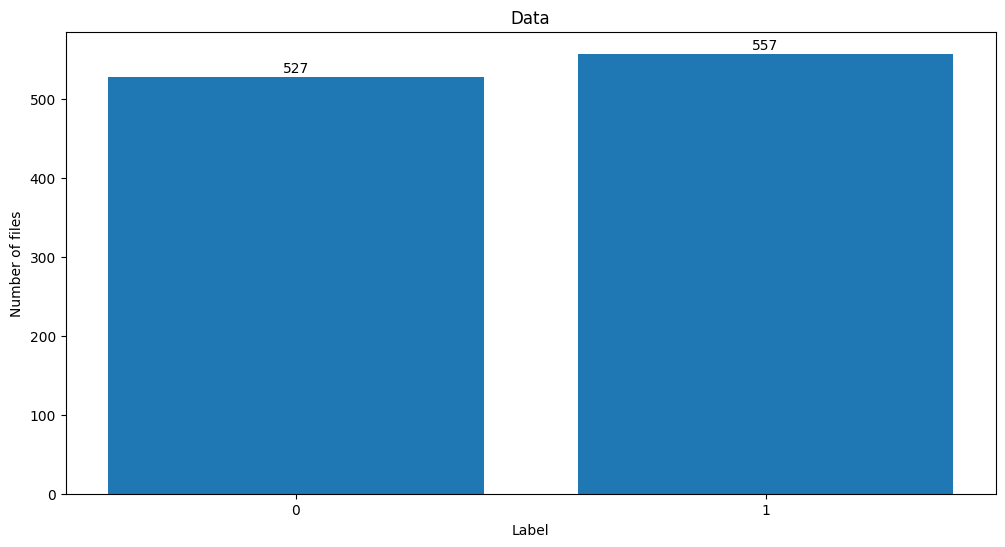

In [18]:
f2 = [item_num2 for item_num2 in data_dir_train.rglob('*')] 
values2, counts2 = np.unique([x2.parent for x2 in f2 ], return_counts=True)
x_value2 = list(counts2)
#print(list(zip(counts2, values2)))
x_name2 = tuple(class_names) 
y_pos2 = np.arange(len(x_name2))
x_value2.pop(0)
print(x_value2)
plt.subplots(figsize=(12,6))
bars = plt.bar(y_pos2, x_value2, align='center', alpha=1)
for bar in bars:
    yval2 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval2 + 2, yval2, ha='center', va='bottom')
plt.xticks(y_pos2, x_name2)
plt.xlabel('Label')
plt.ylabel('Number of files')
plt.title('Data')
plt.show()

## Loading Data Set 

###### Loading Training Data

In [19]:
IMG_SIZE = 256
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_train.append(np.array(img))
        Z_train.append(str(label))

X_train=[]
Z_train=[]

NOTFIRE='Fire-Detection-train/0'
FIRE='Fire-Detection-train/1'

make_train_data('NOTFIRE',NOTFIRE)
make_train_data('FIRE',FIRE)

np.shape(X_train)
np.save("X_train.npy",X_train)

le=LabelEncoder()
Y_train=le.fit_transform(Z_train)
Y_train=to_categorical(Y_train,2)
#print(Y_train)

X_train=np.load("X_train.npy")
X_train=np.array(X_train)
#x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

100%|████████████████████████████████████████████████████████████████████████████████| 557/557 [00:13<00:00, 42.20it/s]


###### Loading Validation Data

In [20]:
def make_val_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_val.append(np.array(img))
        Z_val.append(str(label))

X_val=[]
Z_val=[]

NOTFIRE='Fire-Detection-val/0'
FIRE='Fire-Detection-val/1'

make_val_data('NOTFIRE',NOTFIRE)
make_val_data('FIRE',FIRE)

np.shape(X_val)
np.save("X_val.npy",X_val)

le=LabelEncoder()
Y_val=le.fit_transform(Z_val)
Y_val=to_categorical(Y_val,2)
#print(Y_val)

X_val=np.load("X_val.npy")
X_val=np.array(X_val)

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:01<00:00, 27.92it/s]


###### Loading Testing Data

In [21]:
def make_test_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_test.append(np.array(img))
        Z_test.append(str(label))

X_test=[]
Z_test=[]

NOTFIRE='Fire-Detection-test/0'
FIRE='Fire-Detection-test/1'

make_test_data('NOTFIRE',NOTFIRE)
make_test_data('FIRE',FIRE)

np.shape(X_test)
np.save("X_test.npy",X_test)

le=LabelEncoder()
Y_test=le.fit_transform(Z_test)
Y_test=to_categorical(Y_test,2)
#print(Y_test)

X_test=np.load("X_test.npy")
X_test=np.array(X_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:01<00:00, 24.32it/s]


##### Visulazie loaded image 

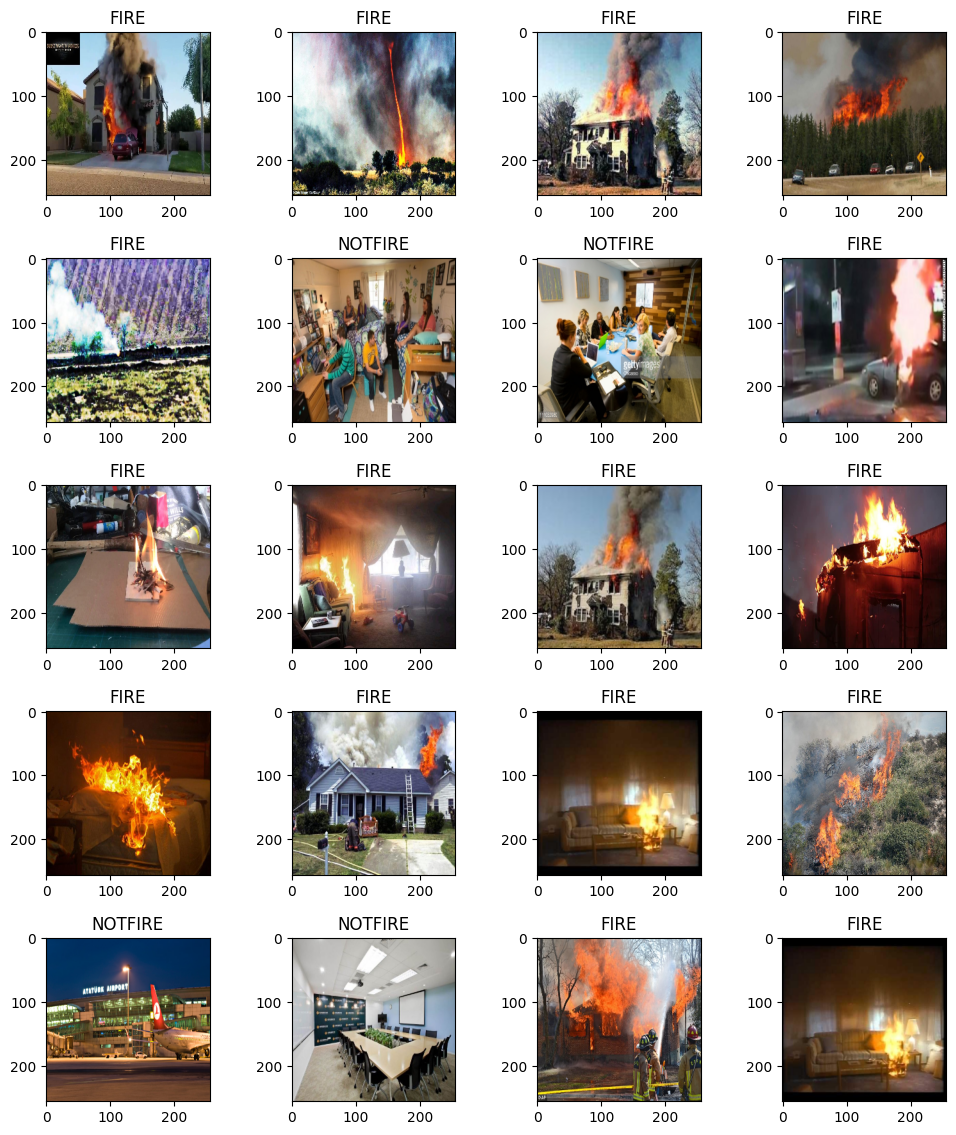

In [22]:
fig, ax = plt.subplots(5, 4)
plt.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.3, wspace=0.5)
fig.set_size_inches(10, 12)  # Adjust the figure size as needed

for i in range(5):
    for j in range(4):
        l = rn.randint(0, len(Z_train)-1)  # Randomly select an index
        ax[i, j].grid(False)
        ax[i, j].imshow(X_train[l][:, :, ::-1])  # Display the image (assuming RGB format)
        ax[i, j].set_title(Z_train[l])  # Set the title as the corresponding label
        ax[i, j].set_aspect('equal')

plt.show()

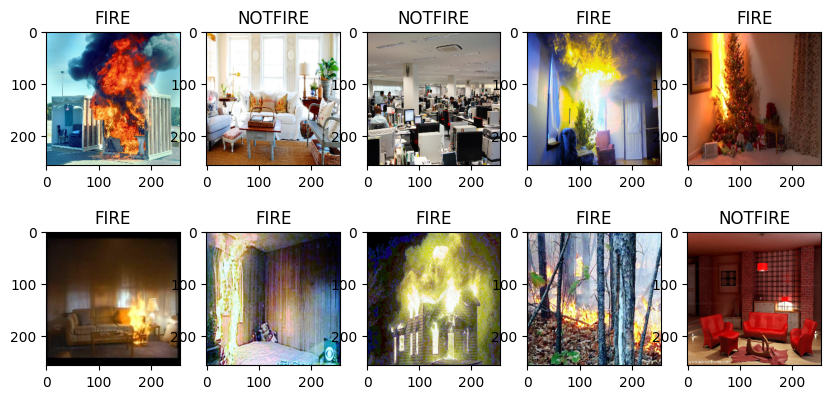

In [23]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z_train))
        ax[i,j].grid(False)
        ax[i,j].imshow(X_train[l][:,:,::-1])
        ax[i,j].set_title(Z_train[l])
        ax[i,j].set_aspect('equal')

In [24]:
import keras

In [25]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Fire-Detection-train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'Fire-Detection-test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1084 files belonging to 2 classes.
Found 247 files belonging to 2 classes.


In [26]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

<br><br><br><br><br>
# Loading image 

In [27]:
link =  'Some Images/Non-fire/1.jpg'
test_img = cv2.imread(link)

##### Reshape the image 

C:\Users\91848\AppData\Local\Temp\ipykernel_8332\3385073888.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(target_shape, Image.ANTIALIAS)


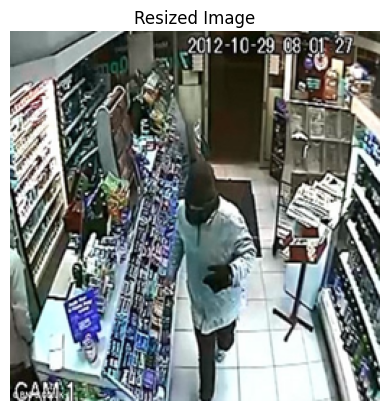

Resized shape with batch dimension: (1, 256, 256, 3)


In [28]:
original_image = test_img
target_shape = (256, 256)

image = Image.fromarray(original_image)
resized_image = image.resize(target_shape, Image.ANTIALIAS)
resized_array = np.array(resized_image)
resized_array_batched = np.expand_dims(resized_array, axis=0)

# plt.subplot(1, 2, 1)
# plt.title('Original Image')
# plt.imshow(original_image)
# plt.axis('off')

# plt.subplot(1, 2, 2)
plt.title('Resized Image')
plt.imshow(resized_array)
plt.axis('off')
plt.show()

print("Resized shape with batch dimension:", resized_array_batched.shape)

#### Fixing colour changing issue 

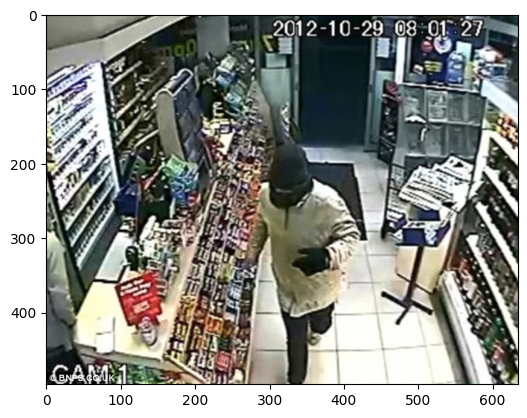

In [29]:
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
image_path = link
bgr_image = cv2.imread(image_path)

# Convert BGR to RGB
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)


#  Model  Creations 

In [30]:
IMG_SIZE = 256

###### ResNet50
ResNet50 is a deep convolutional neural network architecture consisting of 50 layers, known for its effective use of residual connections to address the vanishing gradient problem, making it suitable for various computer vision tasks including image classification, object detection, and segmentation.

###### include_top
include_top=True is used for the original task of the pre-trained model, while include_top=False allows leveraging the convolutional layers for different tasks or customizing the architecture.

###### weights
ImageNet is a large-scale dataset with millions of labeled images across thousands of classes. Pre-training a model on ImageNet allows the model to learn useful feature representations that generalize well to a wide range of visual recognition tasks.

Coco

###### pooling
Max pooling: Selects maximum value from fixed-size window per feature map.
Average pooling: Computes average value within fixed-size window per feature map.
Global pooling: Computes single value per feature map by applying pooling operation across entire feature map.

In [31]:
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE,IMG_SIZE,3), pooling='max')
# base_model.summary()

<br><br>  
 ###### Sequential():
This creates a new Sequential model in Keras. Sequential models are linear stacks of layers, where each layer has exactly one input tensor and one output tensor.

###### model_2.add(base_model):
This effectively "stacks" the ResNet50 model on top of the model_2 i.e. is Sequential model.

###### model_2.add(Dense(2048,activation='relu')):
Adds a densely connected layer with 2048 units and ReLU (Rectified Linear Unit) activation function to model_2.
This layer will take the output from the ResNet50 model and apply a fully connected layer with 2048 neurons, followed by the ReLU activation function.

###### model_2.add(Dense(2,activation='softmax')):
Adds the final output layer with 2 units (assuming it's a binary classification task) and softmax activation function to model_2.
This layer will produce the final output probabilities for the two classes (e.g., class 0 and class 1), where softmax ensures that the sum of the output probabilities is 1.
<br><br><br><br>
              

In [32]:
model_2=Sequential()
model_2.add(base_model)
model_2.add(Dense(2048,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(512,activation='relu'))
model_2.add(Dense(2,activation='softmax'))

<br><br><br>  
###### epochs 
They typically represents the number of times the entire dataset is passed forward and backward through the neural network during training.
<br><br><br><br>  
###### batch_size
 specifies the number of training examples utilized in one iteration.
 Smaller batch sizes consume less memory, but larger batch sizes typically result in more accurate gradients.
<br><br><br><br>  
###### base_model.trainable=False
By setting trainable to False, the weights of the pre-trained model will not be updated during training. This is often done when fine-tuning a model to prevent the pre-trained weights from being modified.
<br><br><br><br>  
###### compile
- `model_2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])`:

  - This line compiles the Keras model `model_2` for training.
  
  - `optimizer=Adam(learning_rate=1e-5)` specifies the optimizer to be used during training. Here, it's Adam with a learning rate of `1e-5` (0.00001).
  
  - `loss='categorical_crossentropy'` specifies the loss function to be used during training. This is common for multi-class classification problems.
  
  - `metrics=['accuracy']` specifies the metrics to be evaluated during training. Here, it's accuracy, which is a common metric for classification tasks.


In [33]:
epochs=20
batch_size=64
base_model.trainable=False
model_2.compile(optimizer=Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,408,066
Trainable params: 6,820,354
Non-trainable params: 23,587,712
_________________________________________________________________


<br><br>
###### Model Fitting

- `History_2 = model_2.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val,Y_val))`:

  - This line trains the Keras `model_2` using the `fit()` method.
  
  - `X_train` and `Y_train` are the input features and corresponding labels used for training the model, respectively.
  
  - `epochs=epochs` specifies the number of epochs (complete passes through the dataset) for which the model will be trained. The value of `epochs` was defined earlier in the code.
  
  - `validation_data=(X_val,Y_val)` specifies the validation data to be used during training. `X_val` and `Y_val` are the validation input features and labels, respectively. The model will not be trained on this data but will use it to evaluate performance after each epoch.
  
  - The training history, including metrics such as loss and accuracy, is stored in the `History_2` variable.


In [34]:
import tensorflow.keras.backend as K

K.clear_session()


In [35]:
History_2 = model_2.fit(X_train, Y_train, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/20
34/34 [==============================] - 68s 766ms/step - loss: 0.8629 - accuracy: 0.7279 - val_loss: 0.2064 - val_accuracy: 0.9297
Epoch 2/20
34/34 [==============================] - 16s 475ms/step - loss: 0.1177 - accuracy: 0.9631 - val_loss: 0.0901 - val_accuracy: 0.9805
Epoch 3/20
34/34 [==============================] - 30s 879ms/step - loss: 0.0503 - accuracy: 0.9889 - val_loss: 0.0495 - val_accuracy: 0.9883
Epoch 4/20
34/34 [==============================] - 30s 895ms/step - loss: 0.0313 - accuracy: 0.9945 - val_loss: 0.0372 - val_accuracy: 0.9922
Epoch 5/20
34/34 [==============================] - 38s 1s/step - loss: 0.0173 - accuracy: 0.9991 - val_loss: 0.0297 - val_accuracy: 0.9922
Epoch 6/20
34/34 [==============================] - 72s 2s/step - loss: 0.0115 - accuracy: 0.9991 - val_loss: 0.0303 - val_accuracy: 0.9961
Epoch 7/20
34/34 [==============================] - 51s 2s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9961
Epoch 8/

<br> <br> 
## Model Accuracy Check


#### Model Accuracy Check :- Graphical<br> <br> 

Training and validation accuracy over epochs for model performance evaluation, with labels and a legend to denote the data, and then displays the plot.

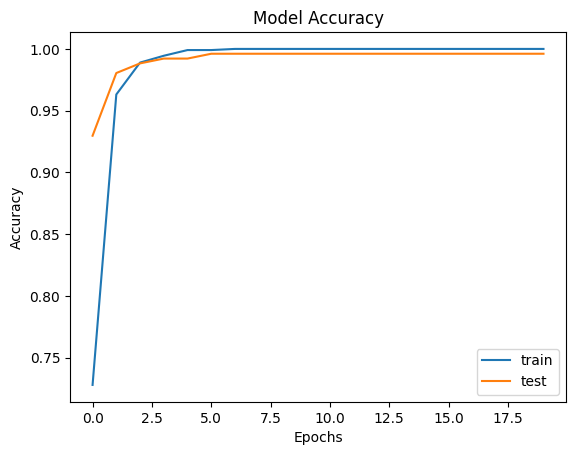

In [36]:
plt.plot(History_2.history['accuracy'])
plt.plot(History_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

This code plots the training and validation loss over epochs for model performance evaluation, with labels and a legend to denote the data, and then displays the plot.

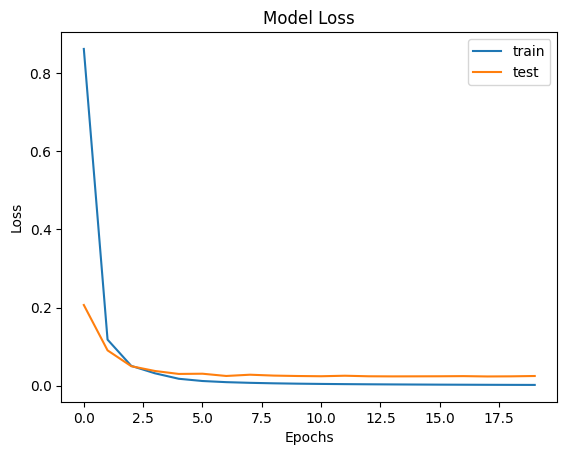

In [37]:
plt.plot(History_2.history['loss'])
plt.plot(History_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

 <br> <br> <br> <br> <br> <br>

# Prediction

In [38]:
link2 = 'Some Images/Non-fire/1.jpg'

In [39]:
image_path = link2
bgr_image = cv2.imread(image_path)

# Convert BGR to RGB
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

original_image = rgb_image
target_shape = (256, 256)
image = Image.fromarray(original_image)
resized_image = image.resize(target_shape, Image.Resampling.LANCZOS)
resized_array = np.array(resized_image)
resized_array_batched = np.expand_dims(resized_array, axis=0)
print("Resized shape with batch dimension:", resized_array_batched.shape)


Resized shape with batch dimension: (1, 256, 256, 3)


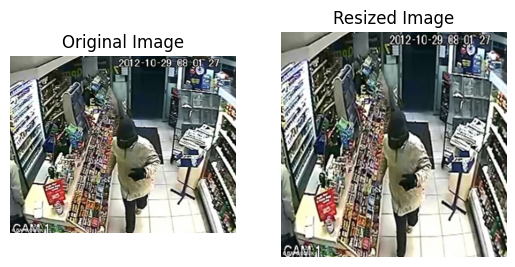

In [40]:
# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# Display the resized image
plt.subplot(1, 2, 2)
plt.title('Resized Image')
plt.imshow(resized_array)
plt.axis('off')

# Show the plots
plt.show()

In [41]:
answer  = model_2.predict(resized_array_batched)
print(answer)

1/1 [==============================] - 7s 7s/step
[[1.7470635e-04 9.9982530e-01]]


In [42]:
# Flatten the array
flattened_array = np.array(answer).flatten()
print(flattened_array)

[1.7470635e-04 9.9982530e-01]


In [43]:
result_array = flattened_array
if (result_array[0] > result_array[1]) or (0.023 < result_array[0]) :
    print("Fire")
else:
    print("Non-Fire")

Non-Fire


<br><br><br>
### Export Model 

In [44]:
# Save the entire model to a HDF5 file
model_2.save("fire_detection_model.h5")


In [45]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("fire_detection_model.h5")
